In [50]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
df = pd.read_csv('/Users/naweedahmed/Desktop/project_3/pin3/winemag-data_first150k.csv')

In [52]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [53]:
df.describe()

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


In [54]:
df.country.unique()

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', nan,
       'India', 'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'Egypt', 'Tunisia', 'US-France'],
      dtype=object)

In [55]:
df.country.value_counts()

US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
England 

In [56]:
df.isna().sum()

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

In [57]:
df.price.describe()

count    137235.000000
mean         33.131482
std          36.322536
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64

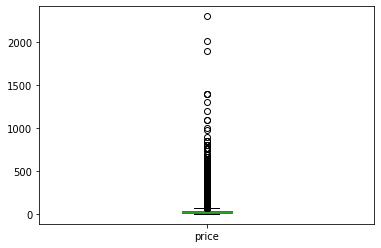

In [58]:
df['price'].plot(kind='box')

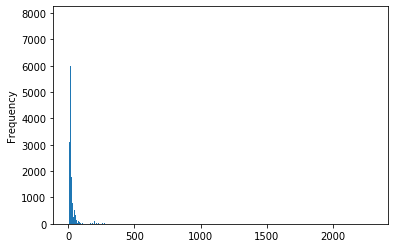

In [59]:
df['price'].plot(kind='hist', bins=2300)

In [60]:
df.dropna(subset=['country','price'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [61]:
df.isna().sum()

Unnamed: 0         0
country            0
description        0
designation    42311
points             0
price              0
province           0
region_1       22837
region_2       76526
variety            0
winery             0
dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137230 entries, 0 to 137229
Data columns (total 11 columns):
Unnamed: 0     137230 non-null int64
country        137230 non-null object
description    137230 non-null object
designation    94919 non-null object
points         137230 non-null int64
price          137230 non-null float64
province       137230 non-null object
region_1       114393 non-null object
region_2       60704 non-null object
variety        137230 non-null object
winery         137230 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 11.5+ MB


In [63]:
df_US_FRA = df.country =='US-France'

In [64]:
df_US_FRA.value_counts()

False    137229
True          1
Name: country, dtype: int64

In [65]:
import numpy as np

In [66]:
continent = []
North_America = ['US','Canada']
Europe = ['Slovakia','Czech Republic','Georgia','Montenegro','Luxembourg','England','Ukraine','Cyprus', 'Lithuania','Switzerland', 'Albania', 'Bosnia and Herzegovina','Serbia','Turkey', 'Macedonia','Spain', 'France', 'Italy', 'Bulgaria','Protugal','Greece', 'Romania', 'Germany',  'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia']
South_America = [ 'Mexico','Brazil','Uruguay','Argentina','Chile']
Oceania = ['New Zealand','Australia']
Asia = ['Japan', 'China', 'South Korea','Israel', 'India', 'Lebanon']
Africa = ['Egypt', 'Tunisia','South Africa', 'Morocco']



In [67]:
def get_cont(c):
    if c in Asia:
        return "Asia"
    elif c in Europe:
        return "Europe"
    elif c in North_America:
        return "North America"
    elif c in Oceania:
        return "Oceania"
    elif c in Africa:
        return "Africa"
    elif c in South_America:
        return "South America"
    else:
        return "Other"
df['continent'] = df['country'].apply(lambda x: get_cont(x))

In [68]:
df.continent.unique()

array(['North America', 'Europe', 'Oceania', 'South America', 'Other',
       'Asia', 'Africa'], dtype=object)

In [69]:
df = df[df['price'] < 1500]

In [70]:
df.price.describe()

count    137227.000000
mean         33.087468
std          35.042587
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        1400.000000
Name: price, dtype: float64

In [71]:
df_europe = df[df.continent == 'Europe']['price']

In [72]:
df_europe.describe()

count    48315.000000
mean        37.406851
std         48.092451
min          4.000000
25%         16.000000
50%         24.000000
75%         43.000000
max       1400.000000
Name: price, dtype: float64

In [73]:
df.describe()

,Unnamed: 0,points,price
count,137227.000000,137227.000000,137227.000000
mean,75730.712506,87.787855,33.087468
std,43867.480050,3.221335,35.042587
min,0.000000,80.000000,4.000000
25%,37590.500000,86.000000,16.000000
50%,75727.000000,88.000000,24.000000
75%,114109.500000,90.000000,40.000000
max,150929.000000,100.000000,1400.000000


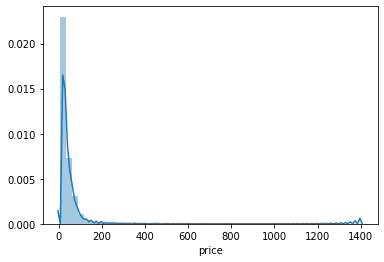

In [74]:
sns.distplot(df_europe)

In [75]:
europe_sample1 = df_europe.sample(n=50)

In [76]:
europe_sample1.mean()

29.08

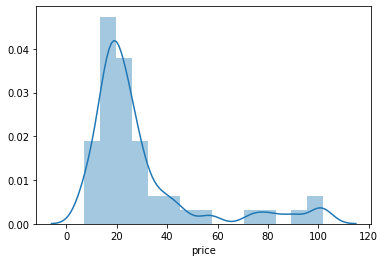

In [77]:
sns.distplot(europe_sample1)

In [78]:
europe_sample2 = df_europe.sample(n=50)

In [79]:
europe_sample2.mean()

39.96

In [80]:
europe_sample3 = df_europe.sample(n=50)

In [81]:
europe_sample3.mean()

29.44

In [82]:
df_asia = df[df.continent == 'Asia']['price']

In [83]:
df_asia.describe()

count    664.000000
mean      30.588855
std       19.285376
min        7.000000
25%       18.000000
50%       25.000000
75%       39.250000
max      150.000000
Name: price, dtype: float64

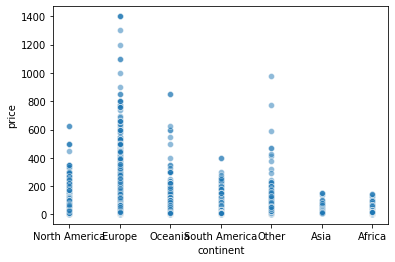

In [84]:
sns.scatterplot(df.continent, df.price, alpha=0.5)

In [85]:
import seaborn as sns

In [86]:
df_na = df[df.continent =='North America']['price']

In [87]:
df_na.head()

0    235.0
2     90.0
3     65.0
8     65.0
9     60.0
Name: price, dtype: float64

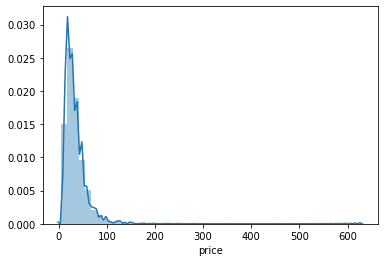

In [88]:
sns.distplot(df_na)

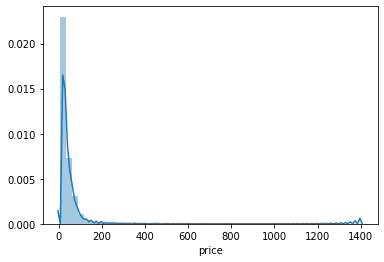

In [89]:
sns.distplot(df_europe)

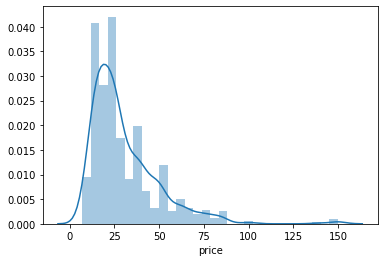

In [90]:
sns.distplot(df_asia)

In [91]:
len(df_europe)

48315

In [92]:
len(df_asia)

664

In [93]:
df_row = df[df.continent !='North America']['price']

In [94]:
df_row.mean()

32.640029374457576

In [95]:
df_europe.mean()

37.406850874469626

In [96]:
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

In [97]:
Cohen_d(df_europe, df_row)

0.10678203878339526

In [98]:
from statsmodels.stats.power import TTestIndPower, TTestPower

In [99]:
power_analysis = TTestIndPower()

In [100]:
power_analysis.solve_power(effect_size=.1068,  alpha=.05, power=.8)

1377.2008042636787

In [101]:
Cohen_d (df_europe, df_asia)

0.14258190085084177

In [102]:
power_analysis.solve_power(effect_size=.1425,  alpha=.05, power=.8)

774.0102882297692

In [103]:
sample_europe = df_europe.sample(n = 50)

In [104]:
sample_row = df_row.sample(n=50)

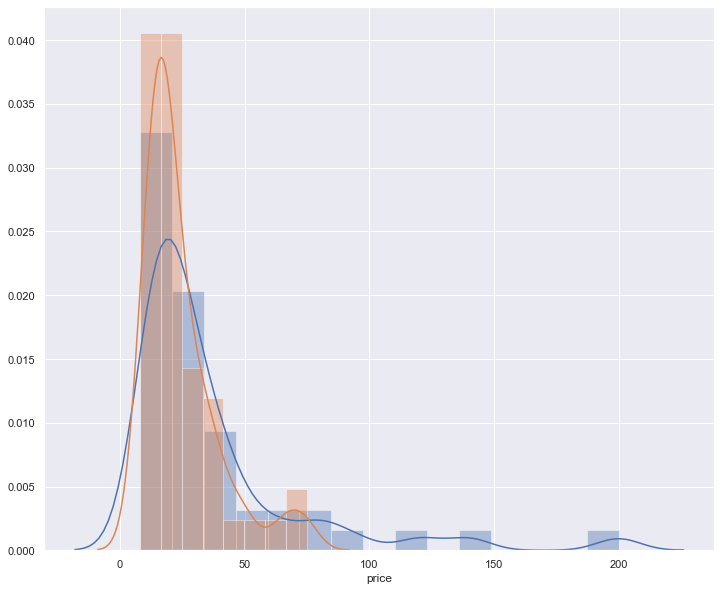

In [105]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(sample_europe) 
sns.distplot(sample_row) 

In [106]:
def sample_variance(sample):
    sample_mean = np.mean(sample)
    return np.sum((sample - sample_mean) **2)/ (len(sample) -1)
    

In [107]:
def pooled_variance(sample1, sample2):
    n_1, n_2 = len(sample1), len(sample2)
    var_1, var_2 = sample_variance(sample1), sample_variance(sample2)
    return ((n_1-1) * var_1 + (n_2-1)* var_2)/((n_1 + n_2)-2)

In [108]:
def twosample_tstatistic(expr, ctrl):
    exp_mean, ctrl_mean = np.mean(expr), np.mean(ctrl)
    pool_var = pooled_variance(expr, ctrl)
    n_e, n_c = len(expr), len(ctrl)
    num = exp_mean - ctrl_mean
    denom = np.sqrt(pool_var * ((1/n_e)+(1/n_c)))
    return num / denom

t_stat = twosample_tstatistic(sample_europe, sample_row)
t_stat

2.1737746661988657

In [ ]:
stats.ttest_ind(sample_europe, sample_row)

In [ ]:
stats.ttest_rel(sample_europe, sample_row)

In [135]:
Cohen_d(df_europe, df_na)

0.10395129412729587

In [ ]:
mean_eu, mean_row = sample_europe.mean(), sample_row.mean()

In [ ]:
std_eu, std_row = np.std.sample_europe.std(ddof=1)

In [ ]:
z_data = [(x - df['0'].mean())/df['0'].std() for x in df['0']]
sns.distplot(z_data)

In [ ]:
sample_europe_df = pd.DataFrame(sample_europe)

In [113]:
import seaborn as sns

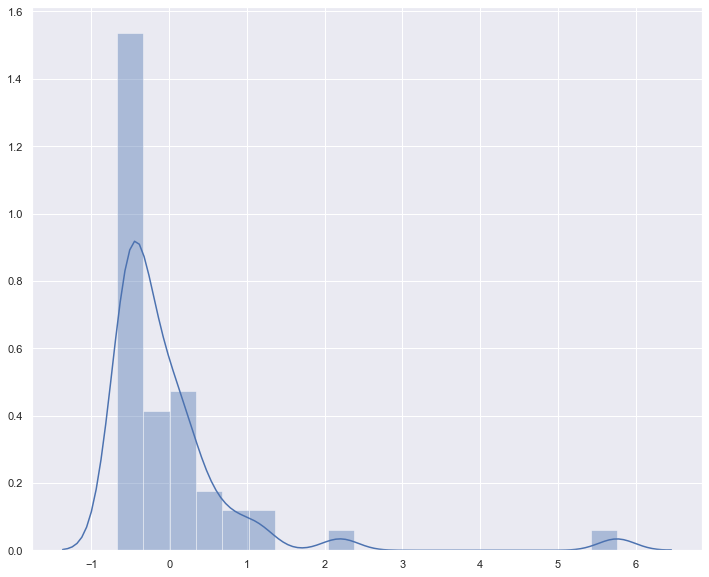

In [115]:
z = [(x-sample_europe_df['price'].mean())/sample_europe_df['price'].std() for x in sample_europe_df['price']]
sns.distplot(z)

In [130]:
z_df = pd.DataFrame(z)

In [132]:
z_df.head()

,0
0,0.754367
1,-0.145027
2,-0.238714
3,-0.426088
4,-0.519775


In [114]:
stats.shapiro(sample_europe_df)

(0.5558906197547913, 4.548137561011245e-11)

In [116]:
import statsmodels.api as sm 
import pylab as py 

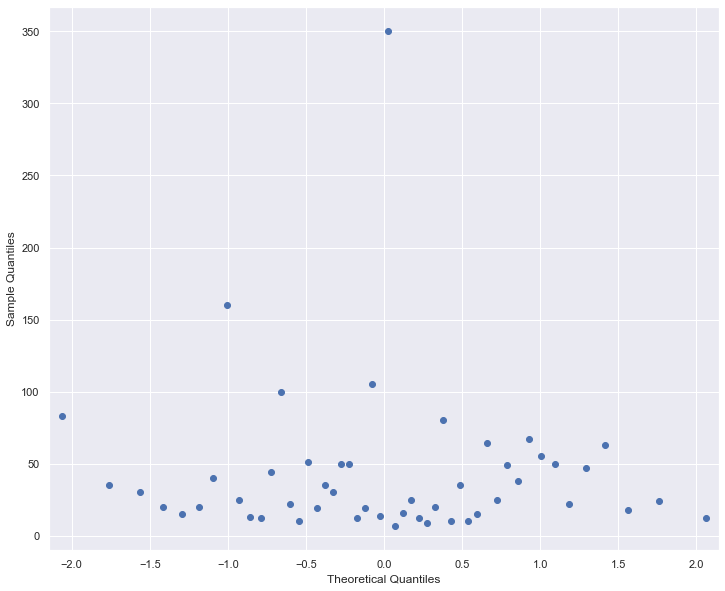

In [127]:
sm.qqplot(sample_europe_df) 
py.show() 

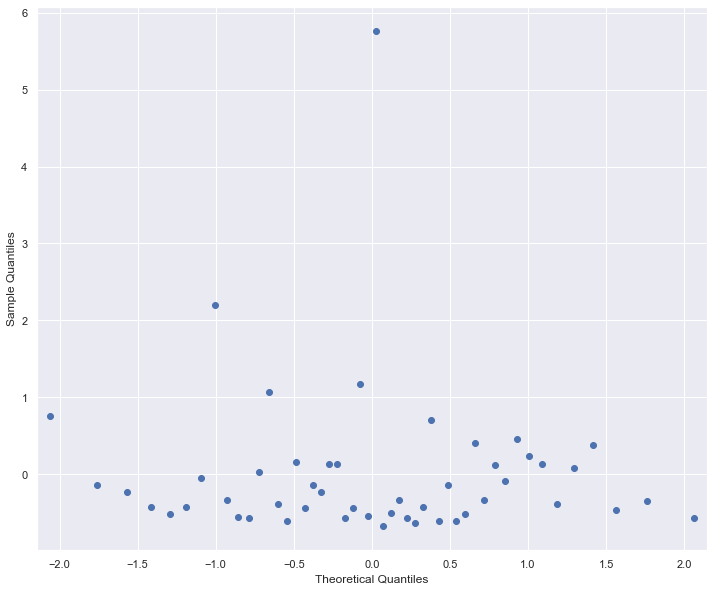

In [134]:
sm.qqplot(z_df) 
py.show() 

In [139]:
sample_europe2 = df_europe.sample(n = 100)
sample_row2 = df_row.sample(n=100)

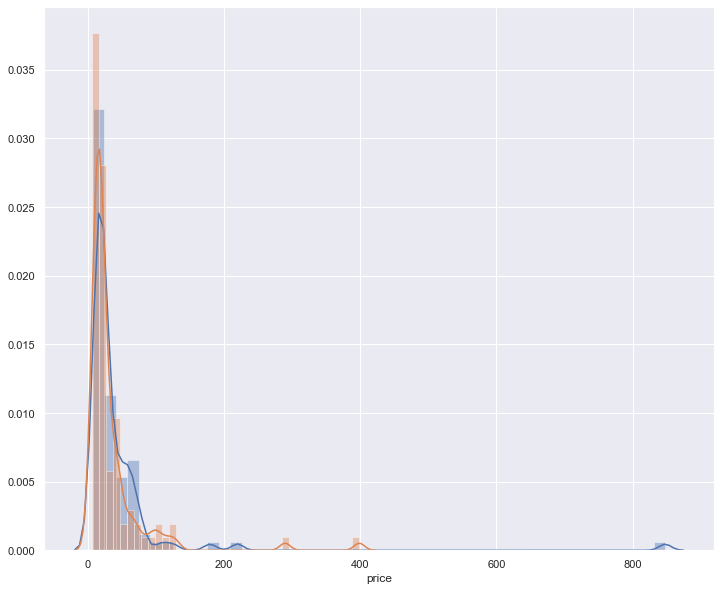

In [137]:
sns.distplot(sample_europe2)
sns.distplot(sample_row2)

In [141]:
sample_europe3 = df_europe.sample(n = 200)
sample_row3 = df_row.sample(n=200)

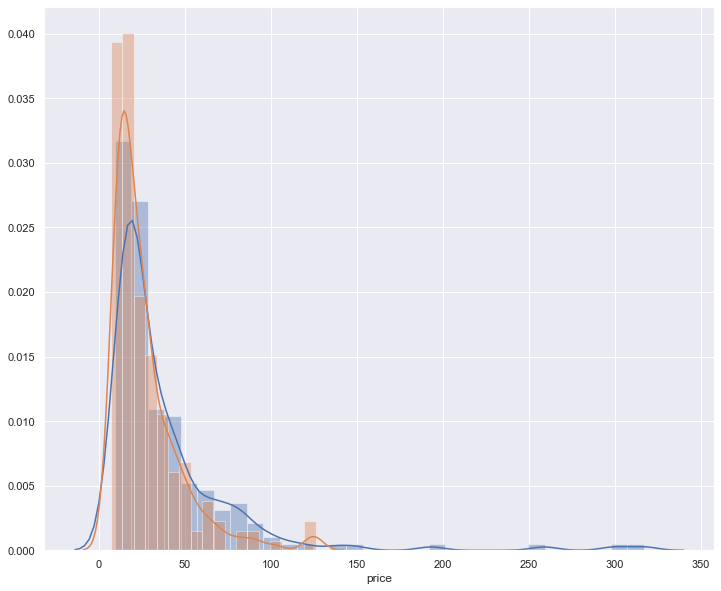

In [142]:
sns.distplot(sample_europe3)
sns.distplot(sample_row3)

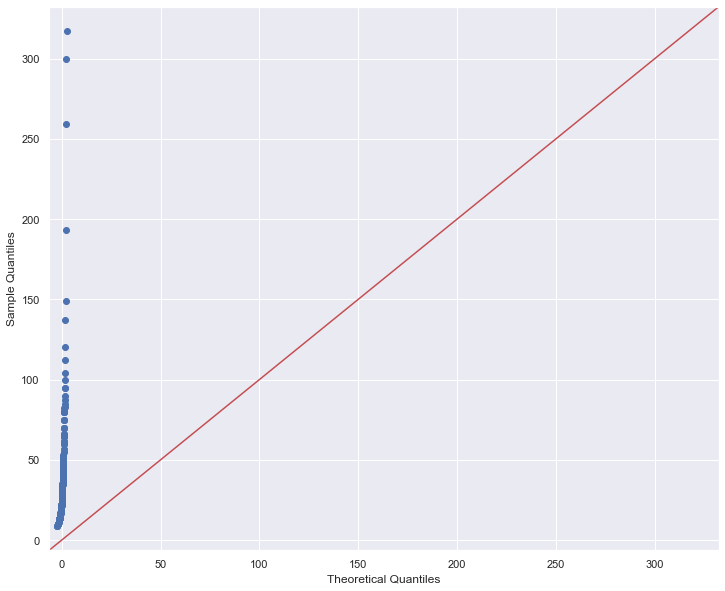

In [145]:
sm.qqplot(sample_europe3, line='45') 
py.show() 

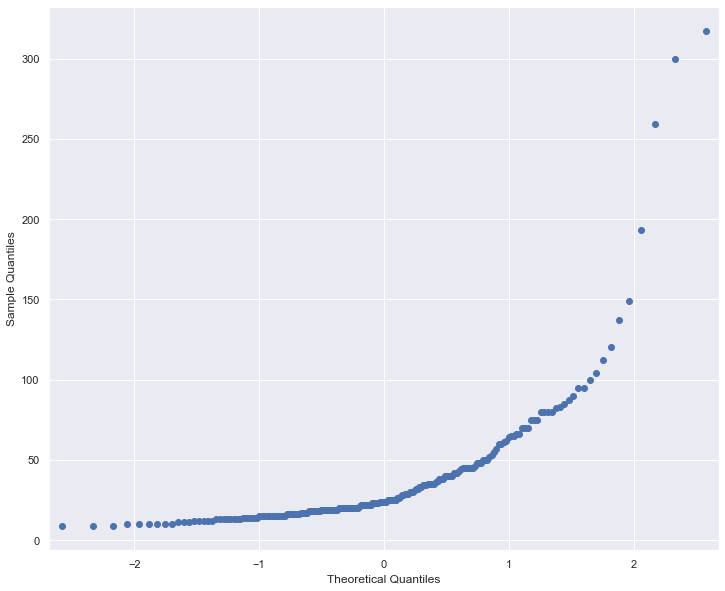

In [146]:
sm.qqplot(sample_europe3) 
py.show() 

In [147]:
stats.normaltest(sample_europe3)

NormaltestResult(statistic=196.4424195791132, pvalue=2.2032845168029047e-43)

In [148]:
sample_europe3_df = pd.DataFrame(sample_europe3)

In [159]:
sample_europe3_df.head()

,price
22765,22.0
47003,95.0
6933,80.0
30627,14.0
48728,10.0


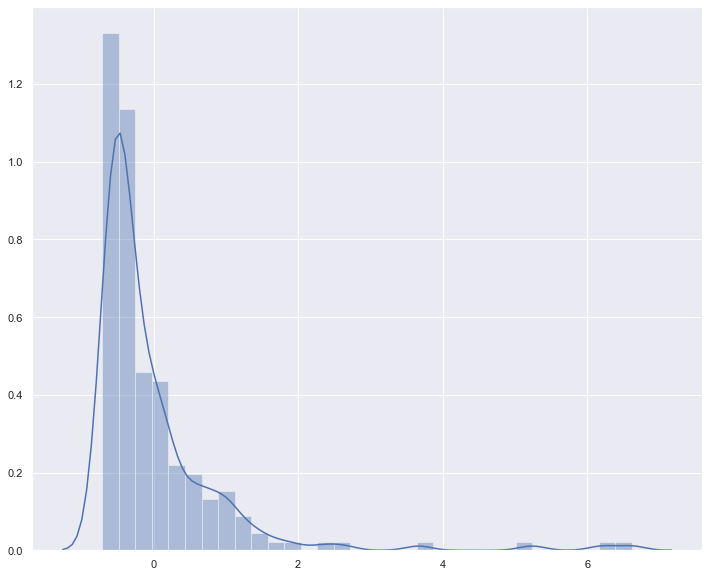

In [152]:
z3 = [(x-sample_europe3_df['price'].mean())/sample_europe3_df['price'].std() for x in sample_europe3_df['price']]
sns.distplot(z3)

In [154]:
z3_df = pd.DataFrame(z3)

In [155]:
z3_df.head()

,0
0,-0.401179
1,1.335321
2,0.978506
3,-0.591480
4,-0.686631


In [156]:
stats.normaltest(z3_df)

NormaltestResult(statistic=array([196.44241958]), pvalue=array([2.20328452e-43]))

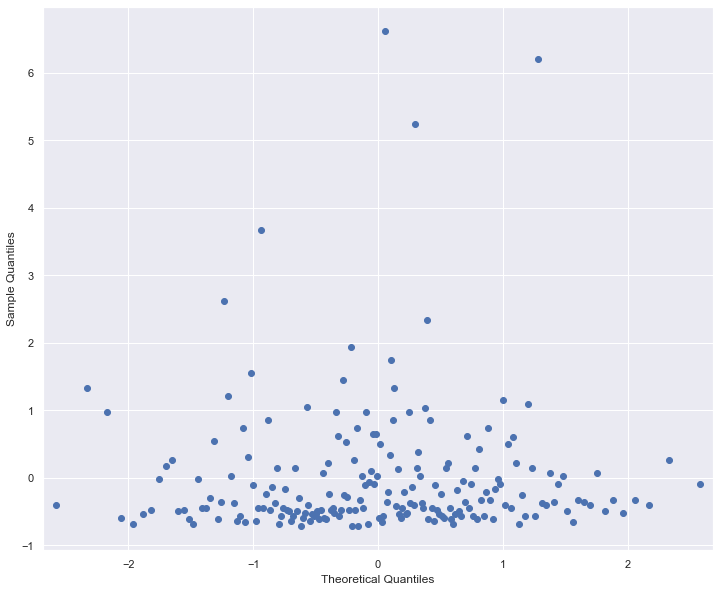

In [157]:
sm.qqplot(z3_df) 
py.show() 

In [160]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,continent
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,North America
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,Europe
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,North America
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,North America
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,Europe


In [163]:
df['points'].describe()

count    137227.000000
mean         87.787855
std           3.221335
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64

In [171]:
df_europe_points = pd.DataFrame(df[df.continent == 'Europe']['points'])

In [172]:
df_europe_points.head()

,points
1,96
4,95
5,95
6,95
7,95


In [173]:
df_row_points = pd.DataFrame(df[df.continent != 'Europe']['points'])

In [174]:
df_row_points.head()

,points
0,96
2,96
3,96
8,95
9,95


In [176]:
sample_europe_points = df_europe_points.sample(n = 200)
sample_row_points = df_row_points.sample(n=200)

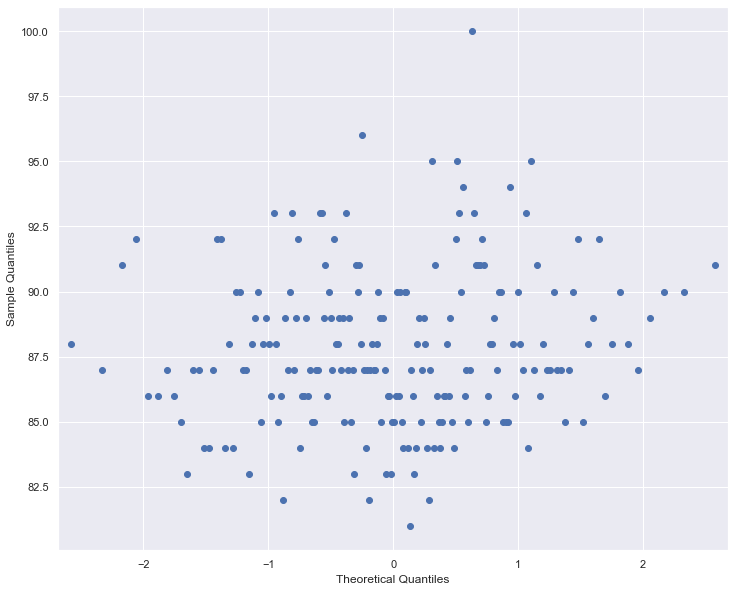

In [179]:
sm.qqplot(sample_europe_points) 
py.show() 

In [180]:
stats.normaltest(sample_europe_points)

NormaltestResult(statistic=array([15.15727366]), pvalue=array([0.00051126]))

In [182]:
sample_europe_points_50 = df_europe_points.sample(n = 50)
sample_row_points_50 = df_row_points.sample(n=50)

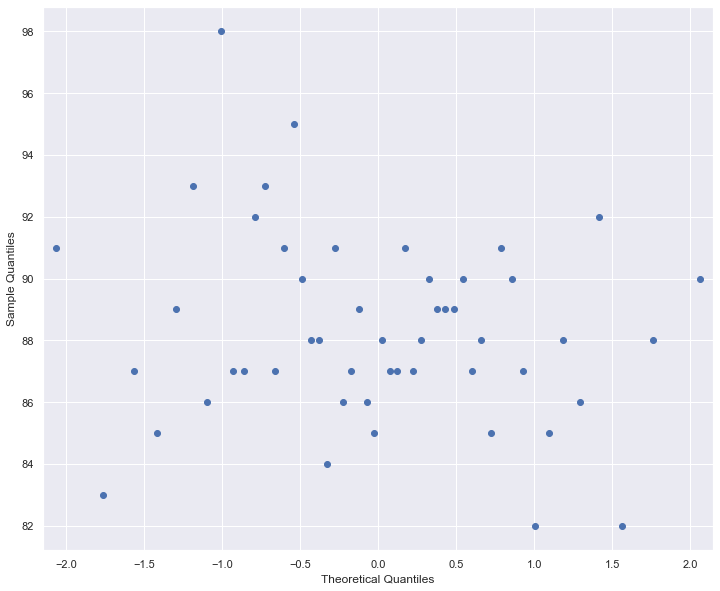

In [183]:
sm.qqplot(sample_europe_points_50) 
py.show() 

In [184]:
stats.normaltest(sample_europe_points_50)

NormaltestResult(statistic=array([4.92020801]), pvalue=array([0.08542607]))

In [185]:
stats.normaltest(sample_row_points_50)

NormaltestResult(statistic=array([0.22482286]), pvalue=array([0.8936765]))

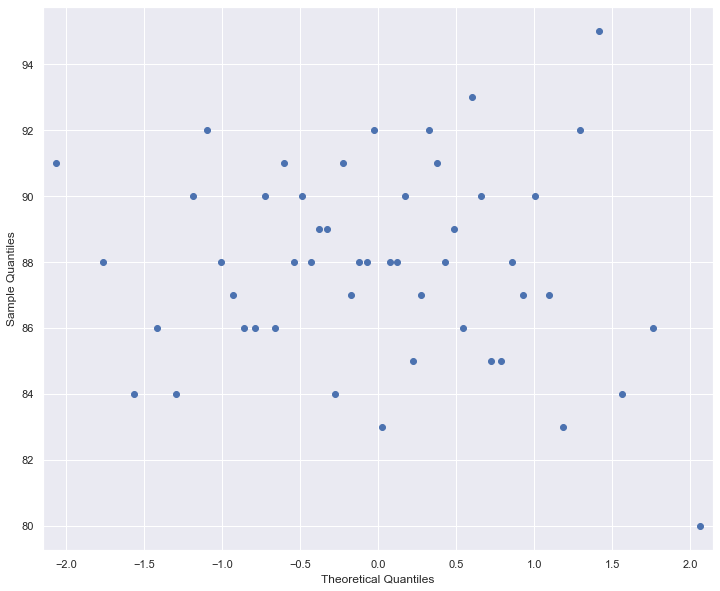

In [186]:
sm.qqplot(sample_row_points_50) 
py.show() 

In [188]:
twosample_tstatistic(sample_europe_points_50, sample_row_points_50)

points    0.624689
dtype: float64

In [189]:
stats.ttest_ind(sample_europe_points_50, sample_row_points_50)

Ttest_indResult(statistic=array([0.62468859]), pvalue=array([0.5336272]))

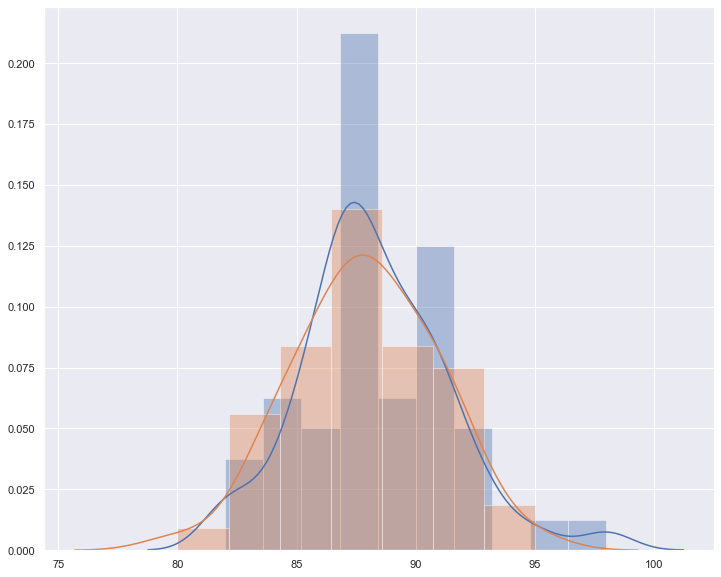

In [190]:
sns.distplot(sample_europe_points_50)
sns.distplot(sample_row_points_50)

In [363]:
animation_df = pd.read_csv('/Users/naweedahmed/Downloads/tmdb-movie-metadata/tmdb_5000_movies.csv')

In [364]:
animation_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [283]:
df_test = animation_df[0:5]

In [289]:
for i, row in df_test:
    print()

ValueError: too many values to unpack (expected 2)

In [210]:
xx = pd.DataFrame(animation_df['genres'])

In [279]:
animation_df['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [280]:
animation_df['genres'][5]

'[{"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}]'

In [214]:
for data in animation_df['genres']: 
    data_row = data['id'] 
    time = data['name'] 
      
    for row in data_row: 
        row['name']= time 
        rows.append(row) 

TypeError: string indices must be integers

In [213]:
xx['genres']

0       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1       [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3       [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
5       [{"id": 14, "name": "Fantasy"}, {"id": 28, "na...
6       [{"id": 16, "name": "Animation"}, {"id": 10751...
7       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
8       [{"id": 12, "name": "Adventure"}, {"id": 14, "...
9       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
10      [{"id": 12, "name": "Adventure"}, {"id": 14, "...
11      [{"id": 12, "name": "Adventure"}, {"id": 28, "...
12      [{"id": 12, "name": "Adventure"}, {"id": 14, "...
13      [{"id": 28, "name": "Action"}, {"id": 12, "nam...
14      [{"id": 28, "name": "Action"}, {"id": 12, "nam...
15      [{"id": 12, "name": "Adventure"}, {"id": 10751...
16      [{"id": 878, "name": "Science Fiction"}, {"id"...
17      [{"id"

In [365]:
from ast import literal_eval

x_ani = animation_df['genres'].apply(literal_eval)

In [366]:
animation_df['genres2'] = x_ani

In [250]:
python_dict

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [246]:
animation_df['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [243]:
from pandas.io.json import json_normalize

df2 = json_normalize(animation_df['genres'], 1)

In [239]:
df2.head()

,0
0,{
1,{
2,{
3,{
4,{


In [217]:
df_pol_ps = animation_df['genres'].apply(pd.Series)

In [229]:
df_pol_ps.loc[5][0]

'[{"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}]'

In [295]:
x1 = pd.DataFrame({'a':[1,2], 'b':[[{'c':1,'d':5},{'c':3, 'd':7}],[{'c':10,'d':50}]]})

In [296]:
df = pd.concat([x1(x) for x in df['b']], keys=df['a']).reset_index(level=1, drop=True).reset_index()

print (df)

KeyError: 'b'

In [297]:
tf = pd.DataFrame([
        {'id': 1, 'nested': {'a': 1, 'b': 2} },
        {'id': 2, 'nested': {'a': 2, 'b': 4} },
        {'id': 3, 'nested': {'a': 3, 'b': 6} },
        {'id': 4, 'nested': {'a': 4}},
    ])


In [298]:
tf

,id,nested
0,1,"{'a': 1, 'b': 2}"
1,2,"{'a': 2, 'b': 4}"
2,3,"{'a': 3, 'b': 6}"
3,4,{'a': 4}


In [299]:
def unpack(df, column, fillna=None):
    ret = None
    if fillna is None:
        ret = pd.concat([df, pd.DataFrame((d for idx, d in df[column].iteritems()))], axis=1)
        del ret[column]
    else:
        ret = pd.concat([df, pd.DataFrame((d for idx, d in df[column].iteritems())).fillna(fillna)], axis=1)
        del ret[column]
    return ret

unpack(tf, 'nested', 0)

,id,a,b
0,1,1,2.0
1,2,2,4.0
2,3,3,6.0
3,4,4,0.0


In [367]:
animation_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genres2
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."


In [306]:
def extract_col_as_df(df, column_name):
    data = [datum[0] for datum in df[column_name]]
    df = animation_df
    return df

df_astronomy = extract_col_as_df(df,'genres2')
df_astronomy.head()

KeyError: 'genres2'

In [368]:
def pipe_flatten_names(keywords):
    return '|'.join([x['name'] for x in keywords])
animation_df['genres2'] = animation_df['genres2'].apply(pipe_flatten_names)
list_genres = set()
for s in animation_df['genres2'].str.split('|'):
    list_genres = set().union(s, list_genres)
list_genres = list(list_genres)
list_genres.remove('')

In [308]:
animation_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genres2
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action|Adventure|Fantasy|Science Fiction
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure|Fantasy|Action
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Action|Adventure|Crime
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Action|Crime|Drama|Thriller
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Action|Adventure|Science Fiction


In [369]:
from ast import literal_eval

x_ani2 = animation_df['production_companies'].apply(literal_eval)

In [370]:
animation_df['prod_co'] = x_ani2

In [371]:
animation_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genres2,prod_co
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action|Adventure|Fantasy|Science Fiction,"[{'name': 'Ingenious Film Partners', 'id': 289..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure|Fantasy|Action,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Action|Adventure|Crime,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Action|Crime|Drama|Thriller,"[{'name': 'Legendary Pictures', 'id': 923}, {'..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Action|Adventure|Science Fiction,"[{'name': 'Walt Disney Pictures', 'id': 2}]"


In [372]:
def pipe_flatten_names2(keywords):
    return '|'.join([x['name'] for x in keywords])
animation_df['prod_co'] = animation_df['prod_co'].apply(pipe_flatten_names)
list_genres = set()
for s in animation_df['prod_co'].str.split('|'):
    list_genres = set().union(s, list_genres)
list_genres = list(list_genres)
list_genres.remove('')

In [373]:
animation_df.head(20)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genres2,prod_co
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Action|Adventure|Crime,Columbia Pictures|Danjaq|B24
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Action|Crime|Drama|Thriller,Legendary Pictures|Warner Bros.|DC Entertainme...
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Action|Adventure|Science Fiction,Walt Disney Pictures
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576,Fantasy|Action|Adventure,Columbia Pictures|Laura Ziskin Productions|Mar...
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330,Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/m

In [424]:
animation_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genres2,prod_co
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Action|Adventure|Crime,Columbia Pictures|Danjaq|B24
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Action|Crime|Drama|Thriller,Legendary Pictures|Warner Bros.|DC Entertainme...
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Action|Adventure|Science Fiction,Walt Disney Pictures


In [427]:
for genre in animation_df:
    animation_df[genre] = animation_df['genres2'].str.contains(genre).apply(lambda x:1 if x else 0)


AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [374]:
new_df = pd.DataFrame(animation_df.genres2.str.split('|').tolist(), index=animation_df.title).stack()
new_df = new_df.reset_index([0, 'title'])
new_df.columns = ['title', 'genre2']

In [375]:
new_df = pd.DataFrame(new_df)

In [376]:
new_df

,title,genre2
0,Avatar,Action
1,Avatar,Adventure
2,Avatar,Fantasy
3,Avatar,Science Fiction
4,Pirates of the Caribbean: At World's End,Adventure
5,Pirates of the Caribbean: At World's End,Fantasy
6,Pirates of the Caribbean: At World's End,Action
7,Spectre,Action
8,Spectre,Adventure
9,Spectre,Crime


In [377]:
y = """SELECT * FROM animation_df WHERE genres2 LIKE '%Animation%'
        """
ani_df_sub = pysqldf(y)
ani_df_sub

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genres2,prod_co
0,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330,Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...
1,200000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",None,62211,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 5984,...",en,Monsters University,A look at the relationship between Mike and Su...,89.186492,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,743559607,104.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,School never looked this scary.,Monsters University,7.0,3528,Animation|Family,Walt Disney Pictures|Pixar Animation Studios
2,200000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://www.disney.go.com/cars/,49013,"[{""id"": 830, ""name"": ""car race""}, {""id"": 9663,...",en,Cars 2,Star race car Lightning McQueen and his pal Ma...,49.986590,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,559852396,106.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Ka-ciao!,Cars 2,5.8,2033,Animation|Family|Adventure|Comedy,Walt Disney Pictures|Pixar Animation Studios
3,200000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/toystory/,10193,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 3616,...",en,Toy Story 3,"Woody, Buzz, and the rest of Andy's toys haven...",59.995418,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,1066969703,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,No toy gets left behind.,Toy Story 3,7.6,4597,Animation|Family|Comedy,Walt Disney Pictures|Pixar Animation Studios
4,175000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 16, ""...",http://movies.disney.com/the-good-dinosaur,105864,"[{""id"": 1720, ""name"": ""tyrannosaurus rex""}, {""...",en,The Good Dinosaur,An epic journey into the world of dinosaurs wh...,51.692953,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,331926147,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Little Arms With Big Attitude,The Good Dinosaur,6.6,1736,Adventure|Animation|Family,Walt Disney Pictures|Pixar Animation Studios
5,185000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 12, ""...",http://disney.go.com/brave/#/home,62177,"[{""id"": 388, ""name"": ""scotland""}, {""id"": 526, ...",en,Brave,Brave is set in the mystical Scottish Highland...,125.114374,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,538983207,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Change your fate.,Brave,6.7,4641,Animation|Adventure|Comedy|Family|Action|Fantasy,Walt Disney Pictures|Pixar Animation Studios
6,180000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/wall-e/,10681,"[{""id"": 9799, ""name"": ""romantic comedy""}]",en,WALL·E,WALL·E is the last robot left on an Earth that...,66.390712,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,521311860,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,An adventure beyond the ordinar-E.,WALL·E,7.8,6296,Animation|Family,Walt Disney Pictures|Pixar Animation Studios|F...
7,200000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 18, ""...",http://disney.go.com/disneypictures/achristmas...,17979,"[{""id"": 65, ""name"": ""holiday""}, {""id"": 818, ""n...",en,A Christmas Carol,Miser Ebenezer Scrooge is awakened o

In [357]:
ani_df_sub.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'genres2', 'prod_co'],
      dtype='object')

In [360]:
len(ani_df_sub)

234

In [379]:
ani_df_sub.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genres2,prod_co
0,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330,Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...
1,200000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",None,62211,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 5984,...",en,Monsters University,A look at the relationship between Mike and Su...,89.186492,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,743559607,104.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,School never looked this scary.,Monsters University,7.0,3528,Animation|Family,Walt Disney Pictures|Pixar Animation Studios
2,200000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://www.disney.go.com/cars/,49013,"[{""id"": 830, ""name"": ""car race""}, {""id"": 9663,...",en,Cars 2,Star race car Lightning McQueen and his pal Ma...,49.986590,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,559852396,106.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Ka-ciao!,Cars 2,5.8,2033,Animation|Family|Adventure|Comedy,Walt Disney Pictures|Pixar Animation Studios
3,200000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/toystory/,10193,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 3616,...",en,Toy Story 3,"Woody, Buzz, and the rest of Andy's toys haven...",59.995418,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,1066969703,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,No toy gets left behind.,Toy Story 3,7.6,4597,Animation|Family|Comedy,Walt Disney Pictures|Pixar Animation Studios
4,175000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 16, ""...",http://movies.disney.com/the-good-dinosaur,105864,"[{""id"": 1720, ""name"": ""tyrannosaurus rex""}, {""...",en,The Good Dinosaur,An epic journey into the world of dinosaurs wh...,51.692953,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,331926147,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Little Arms With Big Attitude,The Good Dinosaur,6.6,1736,Adventure|Animation|Family,Walt Disney Pictures|Pixar Animation Studios


In [400]:
ani_test_data = ani_df_sub

In [401]:
ani_test_data

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genres2,prod_co
0,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330,Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...
1,200000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",None,62211,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 5984,...",en,Monsters University,A look at the relationship between Mike and Su...,89.186492,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,743559607,104.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,School never looked this scary.,Monsters University,7.0,3528,Animation|Family,Walt Disney Pictures|Pixar Animation Studios
2,200000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://www.disney.go.com/cars/,49013,"[{""id"": 830, ""name"": ""car race""}, {""id"": 9663,...",en,Cars 2,Star race car Lightning McQueen and his pal Ma...,49.986590,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,559852396,106.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Ka-ciao!,Cars 2,5.8,2033,Animation|Family|Adventure|Comedy,Walt Disney Pictures|Pixar Animation Studios
3,200000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/toystory/,10193,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 3616,...",en,Toy Story 3,"Woody, Buzz, and the rest of Andy's toys haven...",59.995418,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,1066969703,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,No toy gets left behind.,Toy Story 3,7.6,4597,Animation|Family|Comedy,Walt Disney Pictures|Pixar Animation Studios
4,175000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 16, ""...",http://movies.disney.com/the-good-dinosaur,105864,"[{""id"": 1720, ""name"": ""tyrannosaurus rex""}, {""...",en,The Good Dinosaur,An epic journey into the world of dinosaurs wh...,51.692953,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,331926147,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Little Arms With Big Attitude,The Good Dinosaur,6.6,1736,Adventure|Animation|Family,Walt Disney Pictures|Pixar Animation Studios
5,185000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 12, ""...",http://disney.go.com/brave/#/home,62177,"[{""id"": 388, ""name"": ""scotland""}, {""id"": 526, ...",en,Brave,Brave is set in the mystical Scottish Highland...,125.114374,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,538983207,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Change your fate.,Brave,6.7,4641,Animation|Adventure|Comedy|Family|Action|Fantasy,Walt Disney Pictures|Pixar Animation Studios
6,180000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/wall-e/,10681,"[{""id"": 9799, ""name"": ""romantic comedy""}]",en,WALL·E,WALL·E is the last robot left on an Earth that...,66.390712,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,521311860,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,An adventure beyond the ordinar-E.,WALL·E,7.8,6296,Animation|Family,Walt Disney Pictures|Pixar Animation Studios|F...
7,200000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 18, ""...",http://disney.go.com/disneypictures/achristmas...,17979,"[{""id"": 65, ""name"": ""holiday""}, {""id"": 818, ""n...",en,A Christmas Carol,Miser Ebenezer Scrooge is awakened o

In [402]:
ani_test_data = ani_test_data['prod_co'].apply(lambda x: pd.Series(x.split('|')))

In [403]:
len(ani_test_data)

234

In [404]:
ani_test_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Walt Disney Pictures,Walt Disney Animation Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Walt Disney Pictures,Pixar Animation Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Walt Disney Pictures,Pixar Animation Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Walt Disney Pictures,Pixar Animation Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Walt Disney Pictures,Pixar Animation Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Walt Disney Pictures,Pixar Animation Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Walt Disney Pictures,Pixar Animation Studios,FortyFour Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Walt Disney,ImageMovers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Pixar Animation Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,DreamWorks Animation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [405]:
new_film = pd.read_csv('/Users/naweedahmed/Downloads/imdb-extensive-dataset/IMDb movies.csv')

In [406]:
new_film.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN,NaN,4.0,2.0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN,NaN,24.0,3.0
3,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2019,NaN,NaN,NaN,NaN,28.0,14.0
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,438,NaN,NaN,NaN,NaN,12.0,5.0


In [408]:
y = """SELECT * FROM new_film WHERE genre LIKE '%Animation%'
        """
new_film_sub = pysqldf(y)
new_film_sub

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0015532,Die Abenteuer des Prinzen Achmed,Die Abenteuer des Prinzen Achmed,1926,1928,"Animation, Adventure, Fantasy",81,Germany,None,"Lotte Reiniger, Carl Koch",...,None,A handsome prince rides a flying horse to fara...,7.8,4872,None,None,$ 100156,NaN,44.0,44.0
1,tt0021025,King of Jazz,King of Jazz,1930,1931-03-20,"Animation, Comedy, Music",99,USA,English,John Murray Anderson,...,"Paul Whiteman, John Boles, Laura La Plante, Je...",American Pre-Code color film starring Paul Whi...,6.8,930,$ 2000000,None,None,NaN,36.0,26.0
2,tt0021309,Le roman de Renard,Le roman de Renard,1937,1941-04-10,"Animation, Adventure, Comedy",63,France,French,"Irene Starewicz, Wladyslaw Starewicz",...,"Claude Dauphin, Romain Bouquet, Sylvain Itkine...",When Renard the Fox's mischievous pranks go to...,7.8,1071,None,None,$ 2094,NaN,10.0,7.0
3,tt0025263,Hollywood Party,Hollywood Party,1934,1934-06-01,"Animation, Comedy, Musical",68,USA,English,"Richard Boleslawski, Allan Dwan",...,"Stan Laurel, Oliver Hardy, Jimmy Durante, Jack...",Jimmy Durante is jungle star Schnarzan the Con...,6.2,705,None,None,None,NaN,32.0,16.0
4,tt0026793,Novyy Gulliver,Novyy Gulliver,1935,1935-03-25,"Animation, Adventure, Comedy",75,Soviet Union,Russian,Aleksandr Ptushko,...,"Vladimir Konstantinov, Ivan Yudin, Ivan Bobrov...","While hearing the story of ""Gulliver's Travels...",6.8,229,None,None,None,NaN,3.0,4.0
5,tt0029583,Snow White and the Seven Dwarfs,Snow White and the Seven Dwarfs,1937,1938-07-08,"Animation, Family, Fantasy",83,USA,English,"William Cottrell, David Hand",...,"Roy Atwell, Stuart Buchanan, Adriana Caselotti...",Exiled into the dangerous forest by her wicked...,7.6,168735,$ 1499000,$ 184925486,$ 184925486,95.0,229.0,166.0
6,tt0029912,The Big Broadcast of 1938,The Big Broadcast of 1938,1938,1938-03-09,"Animation, Comedy, Musical",91,USA,English,"Mitchell Leisen, James P. Hogan",...,"W.C. Fields, Martha Raye, Dorothy Lamour, Shir...",The Bellows family causes comic confusion on a...,6.4,812,None,None,None,NaN,27.0,13.0
7,tt0031397,Gulliver's Travels,Gulliver's Travels,1939,1940-05-31,"Animation, Adventure, Comedy",76,USA,English,Dave Fleischer,...,"Jessica Dragonette, Lanny Ross",A doctor washes ashore on an island inhabited ...,6.7,3564,$ 700000,None,None,NaN,58.0,34.0
8,tt0032455,Fantasia,Fantasia,1940,1942-04-03,"Animation, Family, Fantasy",125,USA,English,"James Algar, Samuel Armstrong",...,"Leopold Stokowski, Deems Taylor",A collection of animated interpretations of gr...,7.8,83242,$ 2280000,$ 76408097,$ 76411401,96.0,322.0,110.0
9,tt0032910,Pinocchio,Pinocchio,1940,1940-09-06,"Animation, Comedy, Family",88,USA,English,"Norman Ferguson, T. Hee",...,"Mel Blanc, Don Brodie, Stuart Buchanan, Walter...","A living puppet, with the help of a cricket as...",7.4,120088,$ 2600000,$ 84254167,$ 121892045,99.0,183.0,131.0


In [409]:
new_film_sub.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [416]:
new_film_sub.drop(columns=['writer', 'actors', 'description', 'duration','language'])

,imdb_title_id,title,original_title,year,date_published,genre,country,director,production_company,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0015532,Die Abenteuer des Prinzen Achmed,Die Abenteuer des Prinzen Achmed,1926,1928,"Animation, Adventure, Fantasy",Germany,"Lotte Reiniger, Carl Koch",Comenius-Film GmbH,7.8,4872,None,None,$ 100156,NaN,44.0,44.0
1,tt0021025,King of Jazz,King of Jazz,1930,1931-03-20,"Animation, Comedy, Music",USA,John Murray Anderson,Universal Pictures,6.8,930,$ 2000000,None,None,NaN,36.0,26.0
2,tt0021309,Le roman de Renard,Le roman de Renard,1937,1941-04-10,"Animation, Adventure, Comedy",France,"Irene Starewicz, Wladyslaw Starewicz",Wladyslaw Starewicz Production,7.8,1071,None,None,$ 2094,NaN,10.0,7.0
3,tt0025263,Hollywood Party,Hollywood Party,1934,1934-06-01,"Animation, Comedy, Musical",USA,"Richard Boleslawski, Allan Dwan",Metro-Goldwyn-Mayer (MGM),6.2,705,None,None,None,NaN,32.0,16.0
4,tt0026793,Novyy Gulliver,Novyy Gulliver,1935,1935-03-25,"Animation, Adventure, Comedy",Soviet Union,Aleksandr Ptushko,Mosfilm,6.8,229,None,None,None,NaN,3.0,4.0
5,tt0029583,Snow White and the Seven Dwarfs,Snow White and the Seven Dwarfs,1937,1938-07-08,"Animation, Family, Fantasy",USA,"William Cottrell, David Hand",Walt Disney Productions,7.6,168735,$ 1499000,$ 184925486,$ 184925486,95.0,229.0,166.0
6,tt0029912,The Big Broadcast of 1938,The Big Broadcast of 1938,1938,1938-03-09,"Animation, Comedy, Musical",USA,"Mitchell Leisen, James P. Hogan",Paramount Pictures,6.4,812,None,None,None,NaN,27.0,13.0
7,tt0031397,Gulliver's Travels,Gulliver's Travels,1939,1940-05-31,"Animation, Adventure, Comedy",USA,Dave Fleischer,Fleischer Studios,6.7,3564,$ 700000,None,None,NaN,58.0,34.0
8,tt0032455,Fantasia,Fantasia,1940,1942-04-03,"Animation, Family, Fantasy",USA,"James Algar, Samuel Armstrong",Walt Disney Productions,7.8,83242,$ 2280000,$ 76408097,$ 76411401,96.0,322.0,110.0
9,tt0032910,Pinocchio,Pinocchio,1940,1940-09-06,"Animation, Comedy, Family",USA,"Norman Ferguson, T. Hee",Walt Disney Productions,7.4,120088,$ 2600000,$ 84254167,$ 121892045,99.0,183.0,131.0


In [419]:
len(new_film_sub)

2021

In [423]:
new_film_sub['worlwide_gross_income'].isna().sum()

776

In [418]:
new_film_sub['production_company'].value_counts()

Bandai Visual Company                           36
Aniplex                                         34
Toei Animation                                  34
Walt Disney Pictures                            32
DreamWorks Animation                            29
Walt Disney Productions                         28
Shin Ei Animation                               19
Columbia Pictures                               19
TMS Entertainment                               17
Warner Bros.                                    16
Universal Pictures                              14
Sunrise                                         13
Bird Studios                                    13
Pixar Animation Studios                         13
Soyuzmultfilm                                   13
Anima Estudios                                  13
Asatsu-DK                                       13
Madhouse                                        12
Production I.G.                                 12
Warner Bros. Animation         